In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

def getArrays(tree):

    chi2_c = np.zeros(tree.GetEntries())
    dm2_c = np.zeros(tree.GetEntries())
    sin22th_c = np.zeros(tree.GetEntries())
    
    for j in range(tree.GetEntries()):
        tree.GetEntry(j)
        
        chi2_c[j] = tree.chi2
        dm2_c[j] = tree.dm2
        sin22th_c[j] = tree.sin22th
        
    chi2 = chi2_c[chi2_c>0]
    dm2 = dm2_c[chi2_c>0]
    sin22th = sin22th_c[chi2_c>0]
    return chi2, dm2, sin22th

def getContour(sin22th,dm2):

    adm2 = np.asarray(dm2)
    asin22th = np.asarray(sin22th)

    cosin22th = np.zeros(len(np.unique(adm2)))
    codm2 = np.zeros(len(np.unique(adm2)))

    for i in range(len(np.unique(adm2))):
        indy = np.argmin(asin22th[adm2==adm2[i]])
        cosin22th[i] = asin22th[adm2==np.unique(adm2)[i]][indy]
        codm2[i] = np.unique(adm2)[i]    
    return cosin22th, codm2

def getContourt(tree):

    dm2 = np.zeros(tree.GetEntries())
    sin22th = np.zeros(tree.GetEntries())
    
    for j in range(tree.GetEntries()):
        tree.GetEntry(j)
        
        dm2[j] = tree.dm2
        sin22th[j] = tree.sin22th
    
    adm2 = np.asarray(dm2)
    asin22th = np.asarray(sin22th)


    cosin22th = np.zeros(len(np.unique(adm2)))
    codm2 = np.zeros(len(np.unique(adm2)))

    for i in range(len(np.unique(adm2))):
        indy = np.argmin(asin22th[adm2==adm2[i]])
        cosin22th[i] = asin22th[adm2==np.unique(adm2)[i]][indy]
        codm2[i] = np.unique(adm2)[i]    
    
    return cosin22th, codm2

Welcome to JupyROOT 6.16/00


In [2]:
mb_90_freq_shapeonly        = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/mb_numudis_sense90.txt",delimiter=' ')
mb_90_exclude               = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/mb_numudis_exclude90.txt",delimiter=' ')
ub_90_freq_shaperate_wilks  = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_nonfreq_sens90_1x.txt",delimiter=' ')
ub_90_freq_shaperate        = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_1x.txt",delimiter=' ')
ub_90_freq_shaperate_scaled = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_40x.txt",delimiter=' ')
ub_90_freq_shaperate_statsonly = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_1x_statsonly.txt",delimiter=' ')
ub_90_nonfreq_rateonly = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_rateonly_numudis_nonfreq_sens90_1x.txt",delimiter=' ')


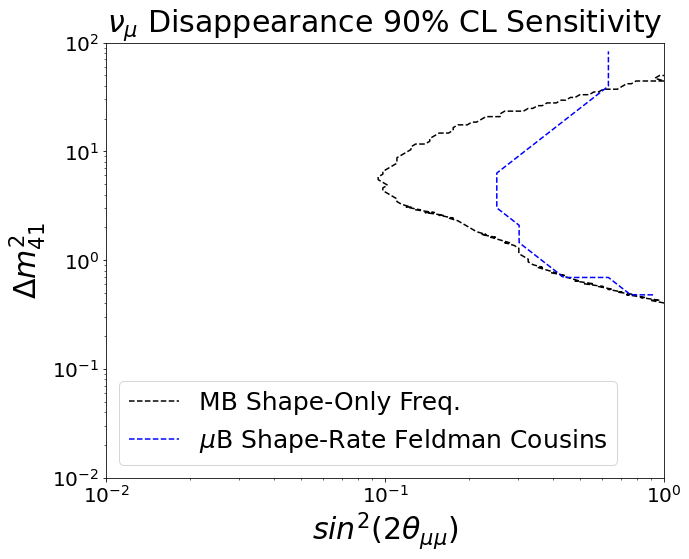

In [4]:
fig,ax = plt.subplots(figsize=(10,8))
plt.xscale("log")
plt.yscale("log")
plt.title(r"$\nu_\mu$ Disappearance 90% CL Sensitivity",fontsize=30)
plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.ylim([0.01,100])
plt.xlim([0.01,1.])

# High dM Limit
xval = 2*1.28*0.1434
him_xs = [xval,xval]
him_ys = [0.01,100]
# him_line, = ax.plot(him_xs,him_ys, color='red', linestyle='dashed', label=r'High $\Delta m^2$ Limit')
mb_shapeonly_line, = ax.plot(mb_90_freq_shapeonly[:,1],mb_90_freq_shapeonly[:,0], color='black', linestyle='dashed', label=r'MB Shape-Only Freq.')
ub_shaperate_line, = ax.plot(ub_90_freq_shaperate[:,0],ub_90_freq_shaperate[:,1], color='blue', linestyle='dashed', label=r"$\mu$B Shape-Rate Feldman Cousins")
# ub_shaperate_wilks_line,  = ax.plot(ub_90_freq_shaperate_wilks[:,0],ub_90_freq_shaperate_wilks[:,1], color='green', linestyle='dashed', label=r"$\mu$B Shape-Rate Feldman Wilks")
# ax.legend(handles=[mb_shapeonly_line, ub_shaperate_line,ub_shaperate_wilks_line],fontsize=25)
ax.legend(handles=[mb_shapeonly_line, ub_shaperate_line],fontsize=25)


0.367104


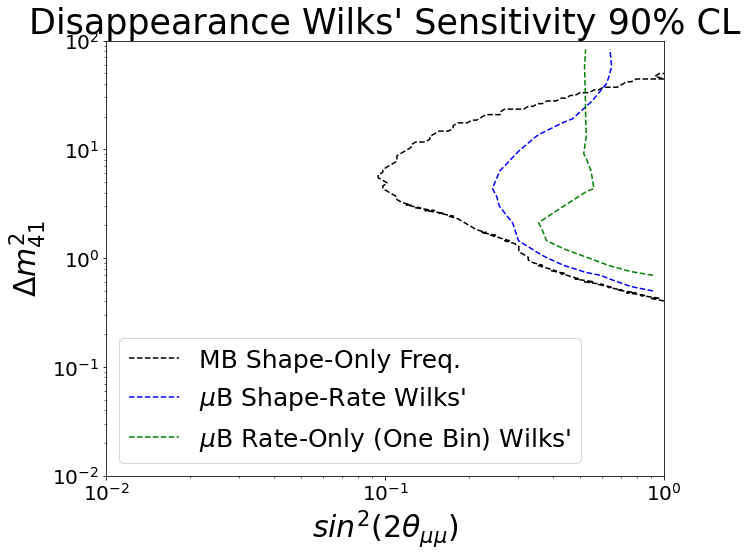

In [4]:
fig,ax = plt.subplots(figsize=(10,8))
plt.xscale("log")
plt.yscale("log")
plt.title(r"Disappearance Wilks' Sensitivity 90% CL",fontsize=35)
plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.ylim([0.01,100])
plt.xlim([0.01,1.])

# High dM Limit
xval = 2*1.28*0.1434
# xval = 2*2.7*0.1434
print(xval)
him_xs = [xval,xval]
him_ys = [0.01,100]
# him_line, = ax.plot(him_xs,him_ys, color='red', linestyle='dashed', label=r'High $\Delta m^2$ Limit')
mb_shapeonly_line, = ax.plot(mb_90_freq_shapeonly[:,1],mb_90_freq_shapeonly[:,0], color='black', linestyle='dashed', label=r'MB Shape-Only Freq.')
ub_shaperate_line, = ax.plot(ub_90_freq_shaperate_wilks[:,0],ub_90_freq_shaperate_wilks[:,1], color='blue', linestyle='dashed', label=r"$\mu$B Shape-Rate Wilks'")
ub_rateonly_line,  = ax.plot(ub_90_nonfreq_rateonly[:,0],ub_90_nonfreq_rateonly[:,1], color='green', linestyle='dashed', label=r"$\mu$B Rate-Only (One Bin) Wilks'")
# ax.legend(handles=[mb_shapeonly_line, ub_shaperate_line,ub_rateonly_line,him_line],fontsize=25)
ax.legend(handles=[mb_shapeonly_line, ub_shaperate_line,ub_rateonly_line],fontsize=25)


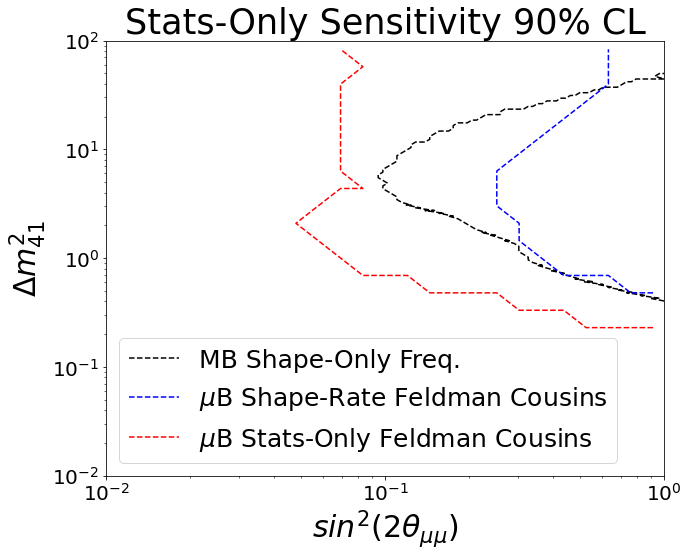

In [5]:
fig,ax = plt.subplots(figsize=(10,8))
plt.xscale("log")
plt.yscale("log")
plt.title(r"Stats-Only Sensitivity 90% CL",fontsize=35)
plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.ylim([0.01,100])
plt.xlim([0.01,1.])

# High dM Limit
# xval = 2*1.28*0.1434
# him_xs = [xval,xval]
# him_ys = [0.01,100]
# him_line, = ax.plot(him_xs,him_ys, color='red', linestyle='dashed', label=r'High $\Delta m^2$ Limit')
mb_shapeonly_line, = ax.plot(mb_90_freq_shapeonly[:,1],mb_90_freq_shapeonly[:,0], color='black', linestyle='dashed', label=r'MB Shape-Only Freq.')
ub_shaperate_line, = ax.plot(ub_90_freq_shaperate[:,0],ub_90_freq_shaperate[:,1], color='blue', linestyle='dashed', label=r"$\mu$B Shape-Rate Feldman Cousins")
ub_shaperate_statsonly_line, = ax.plot(ub_90_freq_shaperate_statsonly[:,0],ub_90_freq_shaperate_statsonly[:,1], color='red', linestyle='dashed', label=r"$\mu$B Stats-Only Feldman Cousins")

ax.legend(handles=[mb_shapeonly_line, ub_shaperate_line, ub_shaperate_statsonly_line],fontsize=25)


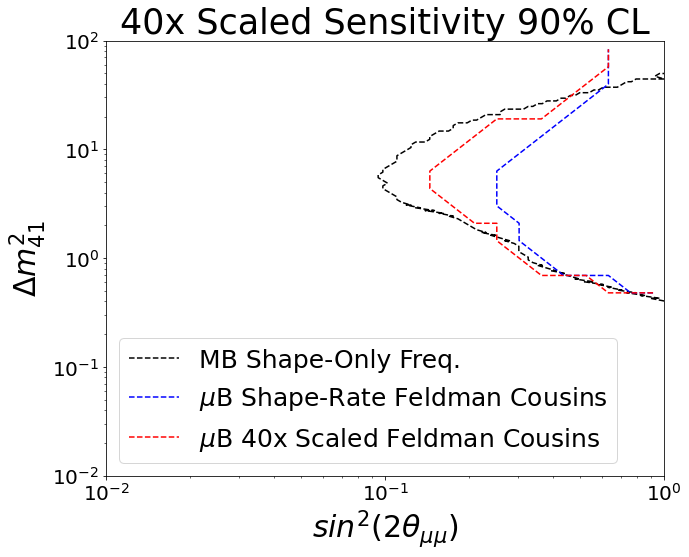

In [6]:
fig,ax = plt.subplots(figsize=(10,8))
plt.xscale("log")
plt.yscale("log")
plt.title(r"40x Scaled Sensitivity 90% CL",fontsize=35)
plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.ylim([0.01,100])
plt.xlim([0.01,1.])
xval = 2*1.28*0.1434

# High dM Limit
# him_xs = [xval,xval]
# him_ys = [0.01,100]
# him_line, = ax.plot(him_xs,him_ys, color='red', linestyle='dashed', label=r'High $\Delta m^2$ Limit')
mb_shapeonly_line, = ax.plot(mb_90_freq_shapeonly[:,1],mb_90_freq_shapeonly[:,0], color='black', linestyle='dashed', label=r'MB Shape-Only Freq.')
ub_shaperate_line, = ax.plot(ub_90_freq_shaperate[:,0],ub_90_freq_shaperate[:,1], color='blue', linestyle='dashed', label=r"$\mu$B Shape-Rate Feldman Cousins")
ub_shaperate_scaled_line, = ax.plot(ub_90_freq_shaperate_scaled[:,0],ub_90_freq_shaperate_scaled[:,1], color='red', linestyle='dashed', label=r"$\mu$B 40x Scaled Feldman Cousins")

ax.legend(handles=[mb_shapeonly_line, ub_shaperate_line, ub_shaperate_scaled_line],fontsize=25)


Get values from text files which have the frquentist study results

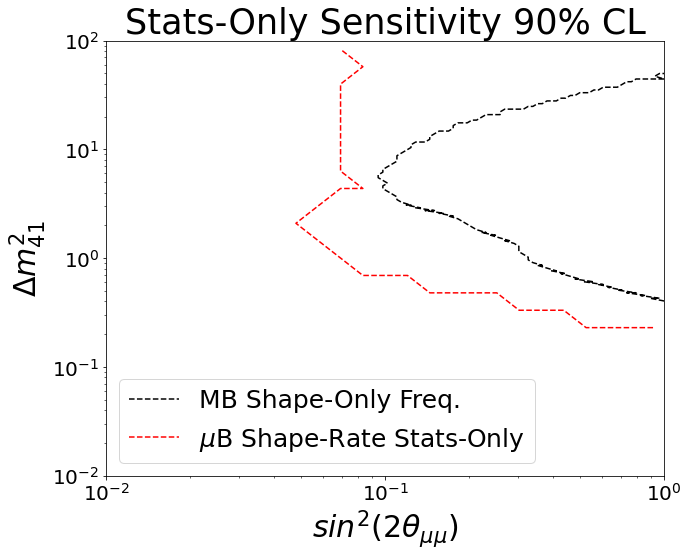

In [7]:
# NOTE TO FUTURE JOSH: Calculate the Redline Position using equation 10 in the note,
# and f is the sqrt(normalization uncertainty)

mb_90_freq_shapeonly = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/mb_numudis_sense90.txt",delimiter=' ')
# ub_90_nonfreq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_nonfreq_sens90_1x.txt",delimiter=' ')
ub_90_freq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_1x_statsonly.txt",delimiter=' ')


fig,ax = plt.subplots(figsize=(10,8))
plt.xscale("log")
plt.yscale("log")
plt.title(r"Stats-Only Sensitivity 90% CL",fontsize=35)
plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.ylim([0.01,100])
plt.xlim([0.01,1.])
xval = 2*1.28*0.1434#np.sqrt(0.1434)
# xval = 2*1.28*np.sqrt(0.1434)

him_xs = [xval,xval]
him_ys = [0.01,100]
# him_line, = ax.plot(him_xs,him_ys, color='red', linestyle='dashed', label=r'High $\Delta m^2$ Limit')
# ub_shapeonly_nonfreq_line, = ax.plot(ub_90_nonfreq_shapeonly[:,0],ub_90_nonfreq_shapeonly[:,1], color='navy', linestyle='dashed', label=r'$\mu$B Shape-Only Non-Freq.')
ub_shaperate_freq_line,    = ax.plot(ub_90_freq_shaperate[:,0],ub_90_freq_shaperate[:,1], color='red', linestyle='dashed', label=r"$\mu$B Shape-Rate Stats-Only")
mb_shapeonly_line, = ax.plot(mb_90_freq_shapeonly[:,1],mb_90_freq_shapeonly[:,0], color='black', linestyle='dashed', label=r'MB Shape-Only Freq.')
# ub_shaperate_nonfreq_line,    = ax.plot(ub_90_nonfreq_shaperate[:,0],ub_90_nonfreq_shaperate[:,1], color='cornflowerblue', linestyle='dashed', label=r"$\mu$B Shape-Rate Wilks' Theorem.")

# tex = ax.text(0.0151,0.55,"No Frequentist Correction",fontsize=25)
# ax.legend(handles=[mb_shapeonly_line, ub_shapeonly_nonfreq_line, ub_shaperate_nonfreq_line, him_line],fontsize=25)
# ax.legend(handles=[mb_shapeonly_line, ub_shaperate_freq_line, ub_shaperate_nonfreq_line],fontsize=25)
ax.legend(handles=[mb_shapeonly_line, ub_shaperate_freq_line],fontsize=25)

plt.show()

In [ ]:
# NOTE TO FUTURE JOSH: Calculate the Redline Position using equation 10 in the note,
# and f is the sqrt(normalization uncertainty)

mb_90_freq_shapeonly = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/mb_numudis_sense90.txt",delimiter=' ')
ub_90_nonfreq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_nonfreq_sens90_1x.txt",delimiter=' ')
ub_90_scaled_freq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_40x.txt",delimiter=' ')
ub_90_freq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_1x.txt",delimiter=' ')


fig,ax = plt.subplots(figsize=(10,8))
plt.xscale("log")
plt.yscale("log")
plt.title(r"40x Scaling Sensitivity 90% CL",fontsize=35)
plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.ylim([0.01,100])
plt.xlim([0.01,1.])
xval = 2*1.28*0.1434#np.sqrt(0.1434)
# xval = 2*1.28*np.sqrt(0.1434)

him_xs = [xval,xval]
him_ys = [0.01,100]
# him_line, = ax.plot(him_xs,him_ys, color='red', linestyle='dashed', label=r'High $\Delta m^2$ Limit')
# ub_shapeonly_nonfreq_line, = ax.plot(ub_90_nonfreq_shapeonly[:,0],ub_90_nonfreq_shapeonly[:,1], color='navy', linestyle='dashed', label=r'$\mu$B Shape-Only Non-Freq.')
ub_shaperate_freq_line,    = ax.plot(ub_90_freq_shaperate[:,0],ub_90_freq_shaperate[:,1], color='blue', linestyle='dashed', label=r"$\mu$B Standard Shape-Rate FC")
ub_shaperate_scaled_freq_line,    = ax.plot(ub_90_scaled_freq_shaperate[:,0],ub_90_scaled_freq_shaperate[:,1], color='red', linestyle='dashed', label=r"$\mu$B 40x Scaled Feldman Cousins")
mb_shapeonly_line, = ax.plot(mb_90_freq_shapeonly[:,1],mb_90_freq_shapeonly[:,0], color='black', linestyle='dashed', label=r'MB Shape-Only Freq.')
# ub_shaperate_nonfreq_line,    = ax.plot(ub_90_nonfreq_shaperate[:,0],ub_90_nonfreq_shaperate[:,1], color='cornflowerblue', linestyle='dashed', label=r"$\mu$B Shape-Rate Wilks' Theorem.")

# tex = ax.text(0.0151,0.55,"No Frequentist Correction",fontsize=25)
# ax.legend(handles=[mb_shapeonly_line, ub_shapeonly_nonfreq_line, ub_shaperate_nonfreq_line, him_line],fontsize=25)
# ax.legend(handles=[mb_shapeonly_line, ub_shaperate_freq_line, ub_shaperate_nonfreq_line],fontsize=25)
ax.legend(handles=[mb_shapeonly_line, ub_shaperate_scaled_freq_line,ub_shaperate_freq_line],fontsize=25)

plt.show()

In [ ]:
# NOTE TO FUTURE JOSH: Calculate the Redline Position using equation 10 in the note,
# and f is the sqrt(normalization uncertainty)

mb_90_freq_shapeonly = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/mb_numudis_sense90.txt",delimiter=' ')
ub_90_nonfreq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_nonfreq_sens90_1x.txt",delimiter=' ')
ub_90_freq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_1x.txt",delimiter=' ')


fig,ax = plt.subplots(figsize=(10,8))
plt.xscale("log")
plt.yscale("log")
plt.title(r"$\nu_\mu$ Disappearance 90% CL",fontsize=35)
plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.ylim([0.01,100])
plt.xlim([0.01,1.])
xval = 2*1.28*0.1434#np.sqrt(0.1434)
# xval = 2*1.28*np.sqrt(0.1434)

him_xs = [xval,xval]
him_ys = [0.01,100]
# him_line, = ax.plot(him_xs,him_ys, color='red', linestyle='dashed', label=r'High $\Delta m^2$ Limit')
# ub_shapeonly_nonfreq_line, = ax.plot(ub_90_nonfreq_shapeonly[:,0],ub_90_nonfreq_shapeonly[:,1], color='navy', linestyle='dashed', label=r'$\mu$B Shape-Only Non-Freq.')
ub_shaperate_freq_line,    = ax.plot(ub_90_freq_shaperate[:,0],ub_90_freq_shaperate[:,1], color='red', linestyle='dashed', label=r"$\mu$B Shape-Rate Feldman Cousins")
mb_shapeonly_line, = ax.plot(mb_90_freq_shapeonly[:,1],mb_90_freq_shapeonly[:,0], color='black', linestyle='dashed', label=r'MB Shape-Only Freq.')
# ub_shaperate_nonfreq_line,    = ax.plot(ub_90_nonfreq_shaperate[:,0],ub_90_nonfreq_shaperate[:,1], color='cornflowerblue', linestyle='dashed', label=r"$\mu$B Shape-Rate Wilks' Theorem.")

# tex = ax.text(0.0151,0.55,"No Frequentist Correction",fontsize=25)
# ax.legend(handles=[mb_shapeonly_line, ub_shapeonly_nonfreq_line, ub_shaperate_nonfreq_line, him_line],fontsize=25)
# ax.legend(handles=[mb_shapeonly_line, ub_shaperate_freq_line, ub_shaperate_nonfreq_line],fontsize=25)
ax.legend(handles=[mb_shapeonly_line, ub_shaperate_freq_line],fontsize=25)

plt.show()

In [ ]:
# NOTE TO FUTURE JOSH: Calculate the Redline Position using equation 10 in the note,
# and f is the sqrt(normalization uncertainty)

mb_90_freq_shapeonly = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/mb_numudis_sense90.txt",delimiter=' ')
ub_90_nonfreq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_nonfreq_sens90_1x.txt",delimiter=' ')
# ub_90_nonfreq_shapeonly = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shapeonly_numudis_nonfreq_sens90.txt",delimiter=' ')


fig,ax = plt.subplots(figsize=(10,8))
plt.xscale("log")
plt.yscale("log")
plt.title(r"$\nu_\mu$ Disappearance 90% CL",fontsize=35)
plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.ylim([0.01,100])
plt.xlim([0.01,1.])
xval = 2*1.28*0.1434#np.sqrt(0.1434)
# xval = 2*1.28*np.sqrt(0.1434)

him_xs = [xval,xval]
him_ys = [0.01,100]
him_line, = ax.plot(him_xs,him_ys, color='red', linestyle='dashed', label=r'High $\Delta m^2$ Limit')
# ub_shapeonly_nonfreq_line, = ax.plot(ub_90_nonfreq_shapeonly[:,0],ub_90_nonfreq_shapeonly[:,1], color='navy', linestyle='dashed', label=r'$\mu$B Shape-Only Non-Freq.')
ub_shaperate_nonfreq_line,    = ax.plot(ub_90_nonfreq_shaperate[:,0],ub_90_nonfreq_shaperate[:,1], color='cornflowerblue', linestyle='dashed', label=r"$\mu$B Shape-Rate Wilks' Theorem.")
mb_shapeonly_line, = ax.plot(mb_90_freq_shapeonly[:,1],mb_90_freq_shapeonly[:,0], color='black', linestyle='dashed', label=r'MB Shape-Only Freq.')
# tex = ax.text(0.0151,0.55,"No Frequentist Correction",fontsize=25)
# ax.legend(handles=[mb_shapeonly_line, ub_shapeonly_nonfreq_line, ub_shaperate_nonfreq_line, him_line],fontsize=25)
ax.legend(handles=[mb_shapeonly_line, ub_shaperate_nonfreq_line, him_line],fontsize=25)
plt.show()

In [ ]:
mb_90_freq_shapeonly = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/mb_numudis_sense90.txt",delimiter=' ')
ub_90_freq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_1x.txt",delimiter=' ')

fig,ax = plt.subplots(figsize=(10,8))
plt.xscale("log")
plt.yscale("log")
plt.title(r'$\nu_\mu$ Disappearance 90% CL',fontsize=35)
plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.ylim([0.01,100])
plt.xlim([0.01,1.])
ub_shaperate_line, = ax.plot(ub_90_freq_shaperate[:,0],ub_90_freq_shaperate[:,1], color='deepskyblue', linestyle='dashed', label=r'$\mu$B  Shape-Rate Freq.')
mb_shapeonly_line, = ax.plot(mb_90_freq_shapeonly[:,1],mb_90_freq_shapeonly[:,0], color='black', linestyle='dashed', label=r'MB Shape-Only Freq.')
ax.scatter([0.04],[2],color = 'red',marker='*',s=300)
ax.scatter([0.20],[2],color = 'yellow',marker='*',s=300)
ax.scatter([0.34],[2],color = 'blue',marker='*',s=300)
ax.scatter([0.80],[2],color = 'green',marker='*',s=300)

ax.legend(handles=[mb_shapeonly_line, ub_shaperate_line],fontsize=25)
plt.show()


In [ ]:
# ub_numudis_freq_shaperate_np = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_numudis_critchi2_shaperate_freq_1x.txt",delimiter=' ')
# can = ROOT.TCanvas("can","can",600,500)
# critchi_h = ROOT.TH2D("critchi_h","critchi_h",25,0,25,25,0,25)
# for i in range(25):
#     for j in range(25):
#         critchi_h.SetBinContent(i+1,j+1,ub_numudis_freq_shaperate_np[i,j])
        
# critchi_h.Draw('COLZ')
# can.Draw()

In [17]:
# we're going to load in two arrays
with open("bins.txt","r") as bins:
    lines = bins.readlines()
    lines[0].strip()
    lines[1].strip()
    vals0 = lines[0].split(" ")
    vals1 = lines[1].split(" ")
    m41_list= []
    sin22theta_list= []
    for v in range(len(vals0)-1):
        m41_list.append(float(vals0[v]))
    for v in range(len(vals1)-1):
        sin22theta_list.append(float(vals1[v]))
print("m values:", m41_list )
print(len(m41_list))
print("sin2 values:",sin22theta_list)

m values: [0.01, 0.0144544, 0.020893, 0.0301995, 0.0436516, 0.0630957, 0.0912011, 0.131826, 0.190546, 0.275423, 0.398107, 0.57544, 0.831764, 1.20226, 1.7378, 2.51189, 3.63078, 5.24807, 7.58578, 10.9648, 15.8489, 22.9087, 33.1131, 47.863, 69.1831, 100.0]
26
sin2 values: [0.01, 0.0120226, 0.0144544, 0.017378, 0.020893, 0.0251189, 0.0301995, 0.0363078, 0.0436516, 0.0524807, 0.0630957, 0.0758578, 0.0912011, 0.109648, 0.131826, 0.158489, 0.190546, 0.229087, 0.275423, 0.331131, 0.398107, 0.47863, 0.57544, 0.691831, 0.831764, 1.0]


In [18]:
print(len(m41_list))
print(len(sin22theta_list))
m_vals = [2,2,2,2]
sin_vals = [0.04,0.2,0.34,0.8]
for i in range(len(m_vals)):
    m_idx = 0
    s_idx = 0
    for j in range(len(sin22theta_list)):
        if sin_vals[i] > sin22theta_list[j]:
            s_idx = j
    for k in range(len(m41_list)):
        if m_vals[i] > m41_list[k]:
            m_idx = k
    print(i)
    print(s_idx, m_idx)
    print()

26
26
0
7 14

1
16 14

2
19 14

3
23 14



In [ ]:
ROOT.gStyle.SetOptStat(0)
injFile = ROOT.TFile("/home/jmills/workdir/Disappearance/newLimits/injectionOutFile_3.root","READ")
gridTree = injFile.Get('gridPtloglikes')
# grid_h = None #injFile.Get('gridPtChis/gridPtChi2_h')#ROOT.TH2D()
# gridTree.SetBranchAddress('gridPtChi2_h',grid_h)
grid_np = np.zeros((25,25))
allowed_np = np.zeros((25,25))

can = ROOT.TCanvas("can","can",400,367)
allowed_h = ROOT.TH2D("allowed","allowed",25,0,25,25,0,25)
#
ub_numudis_freq_shaperate_np = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_numudis_rterm_shaperate_freq_1x.txt",delimiter=' ')
critloglike_h = ROOT.TH2D("critR_h","critR_h",25,0,25,25,0,25)
for i in range(25):
    for j in range(25):
        critloglike_h.SetBinContent(i+1,j+1,ub_numudis_freq_shaperate_np[i,j])
        
#
# for i in range(gridTree.GetEntries()):
entry=-1
for ev in gridTree:
    entry += 1
    if entry ==25:
        break
#     if entry != 2:
#         continue
    grid_h = ev.gridPtloglike_h
    # Subtract Minima:
    minima = 999999999999
    min_xidx = 0
    min_yidx = 0
    for i in range(25):
        for j in range(25):
            if minima > grid_h.GetBinContent(i+1,j+1):
                minima = grid_h.GetBinContent(i+1,j+1)
                min_xidx = i
                min_yidx = j
    print("minima", minima)
    for i in range(25):
        for j in range(25):
            val = grid_h.GetBinContent(i+1,j+1)
            grid_h.SetBinContent(i+1,j+1,val-minima)
    
    
    for i in range(25):
        for j in range(25):
            isAllowed = (critloglike_h.GetBinContent(i+1,j+1) > grid_h.GetBinContent(i+1,j+1))
            allowed_h.SetBinContent(i+1,j+1,isAllowed)
            allowed_np[i,j]=isAllowed
            
    fig,ax = plt.subplots(figsize=(7.5,6))
    plt.xscale("log")
    plt.yscale("log")
#     plt.title(r'Sig. Inj. Allowed Regions 90% CL',fontsize=35)
    plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
    plt.ylim([0.01,100])
    plt.xlim([0.01,1.])
    y,x = np.meshgrid(m41_list, sin22theta_list)
    xmod = x[0:-1,0:-1]
    ymod = y[0:-1,0:-1]
    for i in range(xmod.shape[0]):
        for j in range(xmod.shape[1]):
            xmod[i,j] = np.sqrt(x[i,j]*x[i+1,j+1])
            ymod[i,j] = np.sqrt(y[i,j]*y[i+1,j+1])
#     print(allowed_np)  
    contours = plt.contourf(xmod, ymod, allowed_np,[0.5,1.5], colors='lightgreen',label='Allowed Region',fontsize=20);
#     print(min_xidx,min_yidx)
    scatter1 = ax.scatter([xmod[min_xidx,min_yidx]],[ymod[min_xidx,min_yidx]],color = 'red',label="Best Fit",marker='*',s=300)
#     scatter2 = ax.scatter([0.04],[2],color = 'black',label="Injected Signal",marker='*',s=300)
#     scatter2 = ax.scatter([0.2],[2],color = 'black',label="Injected Signal",marker='*',s=300)
#     scatter2 = ax.scatter([0.34],[2],color = 'black',label="Injected Signal",marker='*',s=300)
    scatter2 = ax.scatter([0.8],[2],color = 'black',label="Injected Signal",marker='*',s=300)
    allowhandle = ax.scatter([],[],color = 'lightgreen',label="Allowed Region",marker='o',s=300)

    ax.legend(loc=3,handles=[scatter1, scatter2, allowhandle],fontsize=25)
    plt.show()
            
            
#     allowed_h.Draw("COLZ")
#     grid_h.Draw("COLZ")
#     can.Draw()

    

In [ ]:
# mb_90_freq_shapeonly = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/mb_numudis_sense90.txt",delimiter=' ')
# ub_90_1x_freq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_1x.txt",delimiter=' ')
# ub_90_2x_freq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_2x.txt",delimiter=' ')
# # ub_90_4x_freq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_4x.txt",delimiter=' ')
# ub_90_40x_freq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_40x.txt",delimiter=' ')
# # ub_90_freq_shaperate     = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90.txt",delimiter=' ')


# fig,ax = plt.subplots(figsize=(10,8))
# plt.xscale("log")
# plt.yscale("log")
# plt.title(r'$\nu_\mu$ Disappearance 90% CL',fontsize=35)
# plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
# plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
# plt.ylim([0.01,100])
# plt.xlim([0.01,1.])
# ub_1x_shaperate_freq_line,  = ax.plot(ub_90_1x_freq_shaperate[:,0],ub_90_1x_freq_shaperate[:,1], color='chocolate', linestyle='dashed', label=r'$\mu$B 1x Shape-Rate Freq.')
# ub_2x_shaperate_freq_line,  = ax.plot(ub_90_2x_freq_shaperate[:,0],ub_90_2x_freq_shaperate[:,1], color='green', linestyle='dashed', label=r'$\mu$B 2x Shape-Rate Freq.')
# # ub_4x_shaperate_freq_line,  = ax.plot(ub_90_4x_freq_shaperate[:,0],ub_90_4x_freq_shaperate[:,1], color='blue', linestyle='dashed', label=r'$\mu$B 4x Shape-Rate Freq.')
# ub_40x_shaperate_freq_line, = ax.plot(ub_90_40x_freq_shaperate[:,0],ub_90_40x_freq_shaperate[:,1], color='red', linestyle='dashed', label=r'$\mu$B 40x Shape-Rate Freq.')
# # ub_shaperate_freq_line,    = ax.plot(ub_90_freq_shaperate[:,0],ub_90_freq_shaperate[:,1], color='chocolate', linestyle='dashed', label=r'$\mu$B Shape-Rate Freq.')
# mb_shapeonly_line, = ax.plot(mb_90_freq_shapeonly[:,1],mb_90_freq_shapeonly[:,0], color='black', linestyle='dashed', label=r'MB Shape-Only Freq.')
# ax.legend(handles=[mb_shapeonly_line, ub_1x_shaperate_freq_line, ub_2x_shaperate_freq_line, ub_40x_shaperate_freq_line],fontsize=25)
# plt.show()


In [ ]:
# mb_90_freq_shapeonly = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/mb_numudis_sense90.txt",delimiter=' ')
# ub_90_1x_nonfreq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_nonfreq_sens90_1x.txt",delimiter=' ')
# ub_90_2x_nonfreq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_nonfreq_sens90_2x.txt",delimiter=' ')
# # ub_90_4x_freq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90_4x.txt",delimiter=' ')
# ub_90_40x_nonfreq_shaperate = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_nonfreq_sens90_40x.txt",delimiter=' ')
# # ub_90_freq_shaperate     = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_shaperate_numudis_sens90.txt",delimiter=' ')


# fig,ax = plt.subplots(figsize=(10,8))
# plt.xscale("log")
# plt.yscale("log")
# plt.title(r'$\nu_\mu$ Disappearance 90% CL',fontsize=35)
# plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
# plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
# plt.ylim([0.01,100])
# plt.xlim([0.01,1.])
# ub_1x_shaperate_nonfreq_line,  = ax.plot(ub_90_1x_nonfreq_shaperate[:,0],ub_90_1x_nonfreq_shaperate[:,1], color='chocolate', linestyle='dashed', label=r'$\mu$B 1x Shape-Rate NonFreq.')
# ub_2x_shaperate_nonfreq_line,  = ax.plot(ub_90_2x_nonfreq_shaperate[:,0],ub_90_2x_nonfreq_shaperate[:,1], color='green', linestyle='dashed', label=r'$\mu$B 2x Shape-Rate NonFreq.')
# # ub_4x_shaperate_freq_line,  = ax.plot(ub_90_4x_freq_shaperate[:,0],ub_90_4x_freq_shaperate[:,1], color='blue', linestyle='dashed', label=r'$\mu$B 4x Shape-Rate Freq.')
# ub_40x_shaperate_nonfreq_line, = ax.plot(ub_90_40x_nonfreq_shaperate[:,0],ub_90_40x_nonfreq_shaperate[:,1], color='red', linestyle='dashed', label=r'$\mu$B 40x Shape-Rate NonFreq.')
# # ub_shaperate_freq_line,    = ax.plot(ub_90_freq_shaperate[:,0],ub_90_freq_shaperate[:,1], color='chocolate', linestyle='dashed', label=r'$\mu$B Shape-Rate Freq.')
# mb_shapeonly_line, = ax.plot(mb_90_freq_shapeonly[:,1],mb_90_freq_shapeonly[:,0], color='black', linestyle='dashed', label=r'MB Shape-Only Freq.')
# ax.legend(handles=[mb_shapeonly_line, ub_1x_shaperate_nonfreq_line, ub_2x_shaperate_nonfreq_line, ub_40x_shaperate_nonfreq_line],fontsize=25)
# plt.show()


minima 173.80151470169193
Best Fit:
 [0.12022669107980972] [3.0199536377567124]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:77: UserWarning: The following kwargs were not used by contour: 'label', 'fontsize'


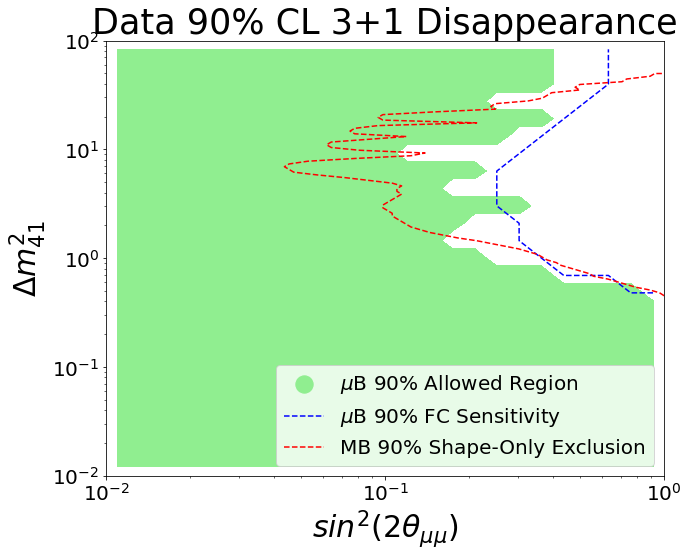

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


In [20]:
# FakeData Test:
ROOT.gStyle.SetOptStat(0)
injFile = ROOT.TFile("/home/jmills/workdir/Disappearance/newLimits/dataTestOutFile.root","READ")
gridTree = injFile.Get('gridPtloglikes')
# grid_h = None #injFile.Get('gridPtChis/gridPtChi2_h')#ROOT.TH2D()
# gridTree.SetBranchAddress('gridPtChi2_h',grid_h)
grid_np = np.zeros((25,25))
allowed_np = np.zeros((25,25))

can = ROOT.TCanvas("can","can",600,500)
allowed_h = ROOT.TH2D("allowed","allowed",25,0,25,25,0,25)
#
ub_numudis_freq_shaperate_np = np.loadtxt("/home/jmills/workdir/Disappearance/newLimits/ub_numudis_rterm_shaperate_freq_1x.txt",delimiter=' ')
critR_h = ROOT.TH2D("critR_h","critR_h",25,0,25,25,0,25)
for i in range(25):
    for j in range(25):
        critR_h.SetBinContent(i+1,j+1,ub_numudis_freq_shaperate_np[i,j])
        
#
# for i in range(gridTree.GetEntries()):
entry=-1
# entry = 1
r_values_grid = np.zeros((25,25))
for ev in gridTree:
    entry += 1
    if entry < 2:
        continue
#     if entry ==2:
#         break
#     if entry != 2:
#         continue
    grid_h = ev.gridPtloglike_h
    # Subtract Minima:
    minima = 999999999999
    min_xidx = 0
    min_yidx = 0
    for i in range(25):
        for j in range(25):
            if minima > grid_h.GetBinContent(i+1,j+1):
                minima = grid_h.GetBinContent(i+1,j+1)
                min_xidx = i
                min_yidx = j
    print("minima", minima)
    deltachi2_np = np.zeros((25,25))
    for i in range(25):
        for j in range(25):
            val = grid_h.GetBinContent(i+1,j+1)
            grid_h.SetBinContent(i+1,j+1,val-minima)
            deltachi2_np[i,j] =val-minima
            r_values_grid[i,j] = val-minima

#     print(deltachi2_np)
    
    for i in range(25):
        for j in range(25):
            isAllowed = (critR_h.GetBinContent(i+1,j+1) > grid_h.GetBinContent(i+1,j+1))
            allowed_h.SetBinContent(i+1,j+1,isAllowed)
            allowed_np[i,j]=isAllowed
            
    fig,ax = plt.subplots(figsize=(10,8))
    plt.xscale("log")
    plt.yscale("log")
#     plt.title(r'90% CL Fakedataset '+str(entry+1),fontsize=35)
    plt.title(r'Data 90% CL 3+1 Disappearance',fontsize=35)
    plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
    plt.ylim([0.01,100])
    plt.xlim([0.01,1.])
    y,x = np.meshgrid(m41_list, sin22theta_list)
    xmod = x[0:-1,0:-1]
    ymod = y[0:-1,0:-1]
    for i in range(xmod.shape[0]):
        for j in range(xmod.shape[1]):
            xmod[i,j] = np.sqrt(x[i,j]*x[i+1,j+1])
            ymod[i,j] = np.sqrt(y[i,j]*y[i+1,j+1])
#     print(allowed_np)  
    contours = plt.contourf(xmod, ymod, allowed_np,[0.5,1.5], colors='lightgreen',label='Allowed Region',fontsize=20);
    print("Best Fit:\n",[xmod[min_xidx,min_yidx]],[ymod[min_xidx,min_yidx]])
#     scatter1 = ax.scatter([xmod[min_xidx,min_yidx]],[ymod[min_xidx,min_yidx]],color = 'red',label="MicroBooNE Best Fit",marker='*',s=500)
#     scatter2 = ax.scatter([0.34],[2],color = 'black',label="Injected Signal",marker='*',s=500)
    allowhandle = ax.scatter([],[],color = 'lightgreen',label="$\mu$B 90% Allowed Region",marker='o',s=300)
    
    #  Plot Sensitivity
    ub_shaperate_line, = ax.plot(ub_90_freq_shaperate[:,0],ub_90_freq_shaperate[:,1], color='blue', linestyle='dashed', label=r"$\mu$B 90% FC Sensitivity")
    mb_shaperate_line, = ax.plot(mb_90_exclude[:,1],mb_90_exclude[:,0], color='red', linestyle='dashed', label=r"MB 90% Shape-Only Exclusion")

#     ax.legend(loc="lower right",handles=[scatter1,allowhandle,ub_shaperate_line, mb_shaperate_line],fontsize=20)
    ax.legend(loc="lower right",handles=[allowhandle,ub_shaperate_line, mb_shaperate_line],fontsize=20)
    plt.show()
            
            
#     allowed_h.Draw("COLZ")
#     grid_h.Draw("COLZ")
#     can.Draw()

    

Print Null Model R Data: 0.8788276767646437
0.001
1030.552498480049


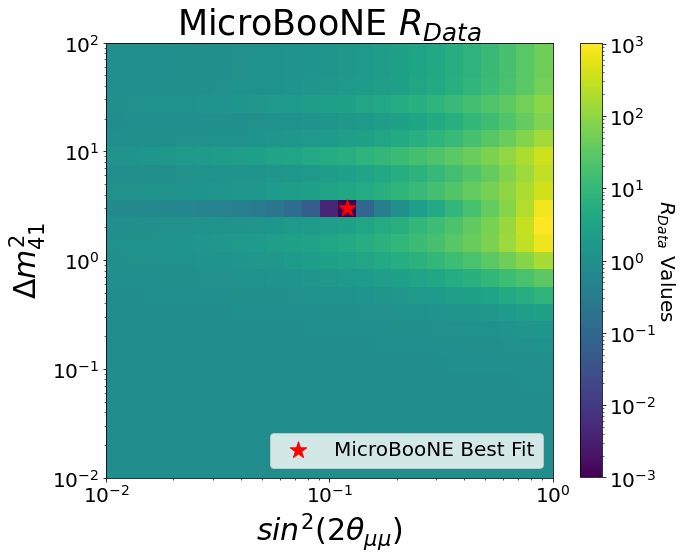

In [8]:
import matplotlib.colors as colors
fig,ax = plt.subplots(figsize=(10,8))
y,x = np.meshgrid(m41_list, sin22theta_list)

vals_grid = np.copy(r_values_grid)
print("Print Null Model R Data:",vals_grid[0,0])
doLog = False
if doLog:
    plt.pcolormesh(x, y, vals_grid)
else:
    vals_grid[vals_grid==0] = 0.001
    plt.pcolormesh(x, y, vals_grid,norm=colors.LogNorm(vmin=vals_grid.min(), vmax=vals_grid.max()))
print(np.min(vals_grid))
print(np.max(vals_grid))
cbar = plt.colorbar()
scatter1 = ax.scatter([xmod[min_xidx,min_yidx]],[ymod[min_xidx,min_yidx]],color = 'red',label="MicroBooNE Best Fit",marker='*',s=300)
# cbar.set_label(r'$R_{Data}$ Values',rotation=270,fontsize=20,labelpad=20)
cbar.set_label(r'$R_{Data}$ Values',rotation=270,fontsize=20,labelpad=20)
plt.title(r'MicroBooNE $R_{Data}$',fontsize=35)
plt.xlabel(r"$sin^2$(2$\theta_{\mu \mu}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.xscale("log")
plt.yscale("log")
ax.legend(loc="lower right",handles=[scatter1],fontsize=20)

plt.show()